In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

I've chosen the epidermal growth factor receptor erbB1, which initiates series of signal transduction cascades that give rise to various biological processes, such as Mesenchymal Stem Cells proliferation/differentiation, tissue remodelling and wound repair.

In [5]:
import csv
with open('Epidermal_growth_factor_receptor_erbB1_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";") 
    rawdata = [x for x in reader] # a list of rows within the csv
rawdata[0] 
#reader returns ordered dictionaries, one for each row

OrderedDict([('Molecule ChEMBL ID', 'CHEMBL4465103'),
             ('Molecule Name', ''),
             ('Molecule Max Phase', '0'),
             ('Molecular Weight', '537.61'),
             ('#RO5 Violations', '1'),
             ('AlogP', '4.34'),
             ('Compound Key', '7e'),
             ('Smiles',
              'C=CC(=O)Nc1cc(Nc2nccc(Nc3ccccc3P(C)(C)=O)n2)c(OC)cc1N(C)CCN(C)C'),
             ('Standard Type', 'IC50'),
             ('Standard Relation', "'='"),
             ('Standard Value', '149.0'),
             ('Standard Units', 'nM'),
             ('pChEMBL Value', '6.83'),
             ('Data Validity Comment', ''),
             ('Comment', ''),
             ('Uo Units', 'UO_0000065'),
             ('Ligand Efficiency BEI', '12.70'),
             ('Ligand Efficiency LE', '0.25'),
             ('Ligand Efficiency LLE', '2.49'),
             ('Ligand Efficiency SEI', '6.11'),
             ('Potential Duplicate', 'False'),
             ('Assay ChEMBL ID', 'CHEMBL4382298'),


In [6]:
print(rawdata[0]['Molecule ChEMBL ID']) # getting first substance ID
print(rawdata[0]['Smiles']) # getting first substance structure in SMILES

CHEMBL4465103
C=CC(=O)Nc1cc(Nc2nccc(Nc3ccccc3P(C)(C)=O)n2)c(OC)cc1N(C)CCN(C)C


In [7]:
ligand_ids = [m['Molecule ChEMBL ID'] for m in rawdata]
ligand_mols = [Chem.MolFromSmiles(m['Smiles']) for m in rawdata]
# the two lists are aligned, so that the ids and the associated structures are in the same order
len(ligand_ids), len(ligand_mols)

(14362, 14362)

In [8]:
[x for x in ligand_mols if not x] # no empty value in the RDKit molecule instance list, so they all parsed ok

[]

In [9]:
ligand_rings = [Chem.GetSSSR(ligand) for ligand in ligand_mols]
ligand_rings[0] # have a look at ring count of the first molecule

3

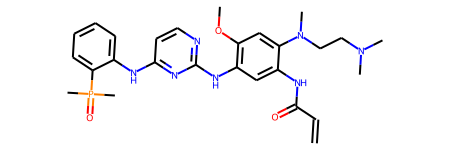

In [10]:
ligand_mols[0]

In [11]:
sum(ligand_rings)/len(ligand_mols)

3.977997493385322

The average ring counts of the ligands of the epidermal growth factor receptor is 3.98, which is more than the average for drugs in DrugBank (2.46).